# Reto-> Entrega 2 (18/11) -> Clasificación-ensambles y presentación ejecutiva
Domingo, Nov 13 2022

---

##### Objetivo: Implementar conocimientos adquiridos a lo largo de curso en el desarrollo de un proyecto con datos reales. 

- Alumno: César Iván Pedrero Martínez
- Matrícula: A01366501
- Profesor: Julio César Galindo López

## Parte 1: Verificar la limpieza.

In [878]:
import numpy as np
import os.path
import pandas as pd

In [879]:
DATASET_PATH = "../data/"
DATASET_NAME = "Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"

In [880]:
def warn(msg):
    """
    Simple replacement to the warning method
    from the common library. Prints a given message
    with a warning prefix.
    """
    warnPrefix = "[WARNING]"
    print(warnPrefix, msg)

def log(msg, start=" ", end="\n"):
    """
    Simple replacement to the print method
    from the common library. Prints a given message
    with a log prefix.
    """
    logPrefix = "[INFO]" + start
    print(logPrefix + str(msg), end=end)

In [881]:
def showRowsWithNan(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Gets the rows from a column with NaN values.
    """
    log("Showing current rows containing NaN for the {} column:".format(col))
    return df[df[col].isna()]

def showRowsWithNanMultiColumn(df: pd.DataFrame, colArray: list) -> pd.DataFrame:
    """
    Gets the rows from a column with NaN values.
    """
    log("Showing current rows containing NaN for the {} columns:".format(colArray))
    nanDF = df[df[colArray].isna().any(axis=1)]
    return nanDF[colArray]

def showColumnswithNaN(df: pd.DataFrame) -> pd.DataFrame:
    """
    Shows all the columns in the data frame along with a
    boolean value that indicates if the column has NaN values
    or not.
    """
    log("Showing current column NaN state:")
    return df.isna().any()

def showUniques(df: pd.DataFrame, col: str) -> list:
    """
    Returns the unique values of a given column
    in the data frame.
    """
    log("Showing unique values for the {} column:".format(col))
    return df[col].unique()

def showAllDataframeTypes(df) -> pd.DataFrame:
    """
    Shows each column of the data frame
    along with its current data type.
    """
    return df.dtypes

In [882]:
df = pd.read_csv(os.path.join(DATASET_PATH, DATASET_NAME), encoding='latin1', index_col=[0])
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,1,1,1,1,1,1,1,1,1,1
1,DLAGU6516,POZO R013 CAÃADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,1,1,1,1,1,1,1,1,1,1
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,1,1,1,0,1,1,1,1,1,1
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,1,1,1,1,1,1,1,1,1,1
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,0,1,0,1,1,1,1,1,1,1
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,1,1,0,1,1,1,1,1,1,1
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,0,1,0,1,1,1,1,1,1,1
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,1,1,1,1,1,1,1,1,1,1


In [883]:
df.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_CR               object
HG_TOT_m

In [884]:
showColumnswithNaN(df)

[INFO] Showing current column NaN state:


CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                False
CALIDAD_ALC             False
CONDUCT_mS/cm           False
CALIDAD_CONDUC          False
SDT_M_mg/L              False
CALIDAD_SDT_ra          False
CALIDAD_SDT_salin       False
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                False
CALIDAD_DUR             False
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L              False
CALIDAD_N_NO3           False
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

## Parte 2: Modificación de variables categóricas.

In [885]:
# We'll need a copy of the target just for visualization at the end.
df["SEMAFORO_str"] = df["SEMAFORO"]

In [886]:
# Let's see what are the categorical values.
categoricalColumns = list(df.select_dtypes(exclude=["int64","bool_", "float64"]).columns)

categoricalColumns.remove("CLAVE") # Id, not needed in processing.
categoricalColumns.remove("SITIO") # Specific name, not needed in processing.
categoricalColumns.remove("CONTAMINANTES") # Comma separated values, will handle separately.
categoricalColumns.remove("SEMAFORO_str") # Copy just for visualization at the end.

categoricalColumns

['ORGANISMO_DE_CUENCA',
 'ESTADO',
 'MUNICIPIO',
 'ACUIFERO',
 'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO',
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'SEMAFORO']

In [887]:
# There's a column that has values comma separated, let's start with that. We need to one-hot encode them into separated columns.

df = pd.concat([df.drop("CONTAMINANTES", 1), df["CONTAMINANTES"].str.get_dummies(sep=",").add_prefix("CONTAMINANTES_")], 1)

/var/folders/3z/3340wyws0q3fr4z6_yx4yc7r0000gn/T/ipykernel_48067/1746299027.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = pd.concat([df.drop("CONTAMINANTES", 1), df["CONTAMINANTES"].str.get_dummies(sep=",").add_prefix("CONTAMINANTES_")], 1)
/var/folders/3z/3340wyws0q3fr4z6_yx4yc7r0000gn/T/ipykernel_48067/1746299027.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df.drop("CONTAMINANTES", 1), df["CONTAMINANTES"].str.get_dummies(sep=",").add_prefix("CONTAMINANTES_")], 1)


In [888]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_M_mg/L',
       'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO',
       'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC',
       'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS',
       'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L',
       'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN',
       'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CUMPLE_CON_ALC',
       'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin',
       'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG',
       'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE', 'SEMAFORO_str',
       'CONTAMINANTES_ALC', 'CONTA

In [889]:
# Now let's encode the other categorical values.
# I'd like to keep the other categories as label encoder as they are not comma separated and a single target column is easier to manage.

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df[categoricalColumns] = df[categoricalColumns].apply(labelencoder.fit_transform)
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CONTAMINANTES_FE,CONTAMINANTES_FLUO,CONTAMINANTES_HG,CONTAMINANTES_MN,CONTAMINANTES_NI,CONTAMINANTES_NINGUNO,CONTAMINANTES_NO3,CONTAMINANTES_PB,CONTAMINANTES_SDT_ra,CONTAMINANTES_SDT_salin
0,DLAGU6,POZO SAN GIL,6,0,25,232,5,-102.02210,22.20887,2020,...,0,0,0,0,0,1,0,0,0,0
1,DLAGU6516,POZO R013 CAÃADA HONDA,6,0,9,232,5,-102.20075,21.99958,2020,...,0,0,0,0,0,1,0,0,0,0
2,DLAGU7,POZO COSIO,6,0,94,228,5,-102.28801,22.36685,2020,...,0,1,0,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,6,0,284,228,5,-102.29449,22.18435,2020,...,0,0,0,0,0,1,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,10,2,197,220,5,-110.24480,23.45138,2020,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),12,18,204,42,5,-99.54191,24.76036,2020,...,0,0,0,0,0,0,1,0,0,0
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),12,18,204,42,5,-99.70099,24.78280,2020,...,0,0,0,0,0,0,1,0,0,0
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,12,18,45,41,5,-99.82249,25.55197,2020,...,0,0,0,0,0,0,1,0,0,0
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,12,18,134,137,5,-100.32683,24.80118,2020,...,0,0,0,0,0,1,0,0,0,0


In [890]:
df.dtypes

CLAVE                      object
SITIO                      object
ORGANISMO_DE_CUENCA         int64
ESTADO                      int64
MUNICIPIO                   int64
                            ...  
CONTAMINANTES_NINGUNO       int64
CONTAMINANTES_NO3           int64
CONTAMINANTES_PB            int64
CONTAMINANTES_SDT_ra        int64
CONTAMINANTES_SDT_salin     int64
Length: 73, dtype: object

## Parte 3: Análisis de la importancia de las variables.

### 3.1: Creación del modelo.

In [891]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import defaultdict

In [892]:
targetLabel = "SEMAFORO"
featuresToIgnore = ["CLAVE", "SITIO", "PERIODO", "SEMAFORO_str", targetLabel]

featureLabels = [e for e in list(df.columns) if e not in featuresToIgnore]

X = df[featureLabels]
y = df[[targetLabel]]

In [893]:
X.shape

(1068, 68)

In [894]:
y.shape

(1068, 1)

In [895]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [896]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [897]:
model = RandomForestClassifier(n_estimators=20, random_state=0) # 20 estimators are just enough.

model.fit(X_train, y_train)

/var/folders/3z/3340wyws0q3fr4z6_yx4yc7r0000gn/T/ipykernel_48067/886015397.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20, random_state=0)

In [898]:
# Let's evaluate the model.

y_pred = model.predict(X_test)

In [899]:
print(confusion_matrix(y_test, y_pred))

[[ 73   0   0]
 [  3 113   0]
 [  0   0 132]]


In [900]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        73
           1       1.00      0.97      0.99       116
           2       1.00      1.00      1.00       132

    accuracy                           0.99       321
   macro avg       0.99      0.99      0.99       321
weighted avg       0.99      0.99      0.99       321



In [901]:
accuracy_score(y_test, y_pred)

0.9906542056074766

### 3.2: Análisis de las varaibles.

In [902]:
importance = model.feature_importances_

In [903]:
def getImportanceDictionary():
    """
    Returns an ordered representation of
    the importances in a dictionary.
    """
    dic = defaultdict(lambda: 0)

    for i, v in enumerate(importance):
        dic[featureLabels[i]] = v
    
    return dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))

def showMostImportantFeatures(n: int = 5):
    """
    Prints the most important features.
    """
    dic = getImportanceDictionary()

    count = 0
    for key in dic:
        log("Feature: %s, Score: %.5f" % (key, dic[key]))
        count += 1
        if count >= n:
            return


In [904]:
# Lets get the most important features.

showMostImportantFeatures(len(featureLabels))

[INFO] Feature: CONTAMINANTES_NINGUNO, Score: 0.14885
[INFO] Feature: FLUORUROS_mg/L, Score: 0.06721
[INFO] Feature: DUR_mg/L, Score: 0.06480
[INFO] Feature: CALIDAD_FLUO, Score: 0.05781
[INFO] Feature: N_NO3_mg/L, Score: 0.05022
[INFO] Feature: CONTAMINANTES_FLUO, Score: 0.04156
[INFO] Feature: CUMPLE_CON_FLUO, Score: 0.03869
[INFO] Feature: COLI_FEC_NMP/100_mL, Score: 0.03720
[INFO] Feature: CUMPLE_CON_AS, Score: 0.03207
[INFO] Feature: CALIDAD_DUR, Score: 0.03060
[INFO] Feature: CONTAMINANTES_AS, Score: 0.02837
[INFO] Feature: CUMPLE_CON_NO3, Score: 0.02790
[INFO] Feature: CONDUCT_mS/cm, Score: 0.02537
[INFO] Feature: CUMPLE_CON_MN, Score: 0.02370
[INFO] Feature: MN_TOT_mg/L, Score: 0.02232
[INFO] Feature: CUMPLE_CON_DUR, Score: 0.02171
[INFO] Feature: CUMPLE_CON_FE, Score: 0.02021
[INFO] Feature: SDT_M_mg/L, Score: 0.01918
[INFO] Feature: AS_TOT_mg/L, Score: 0.01832
[INFO] Feature: CONTAMINANTES_CF, Score: 0.01826
[INFO] Feature: CONTAMINANTES_FE, Score: 0.01448
[INFO] Feature: CUM

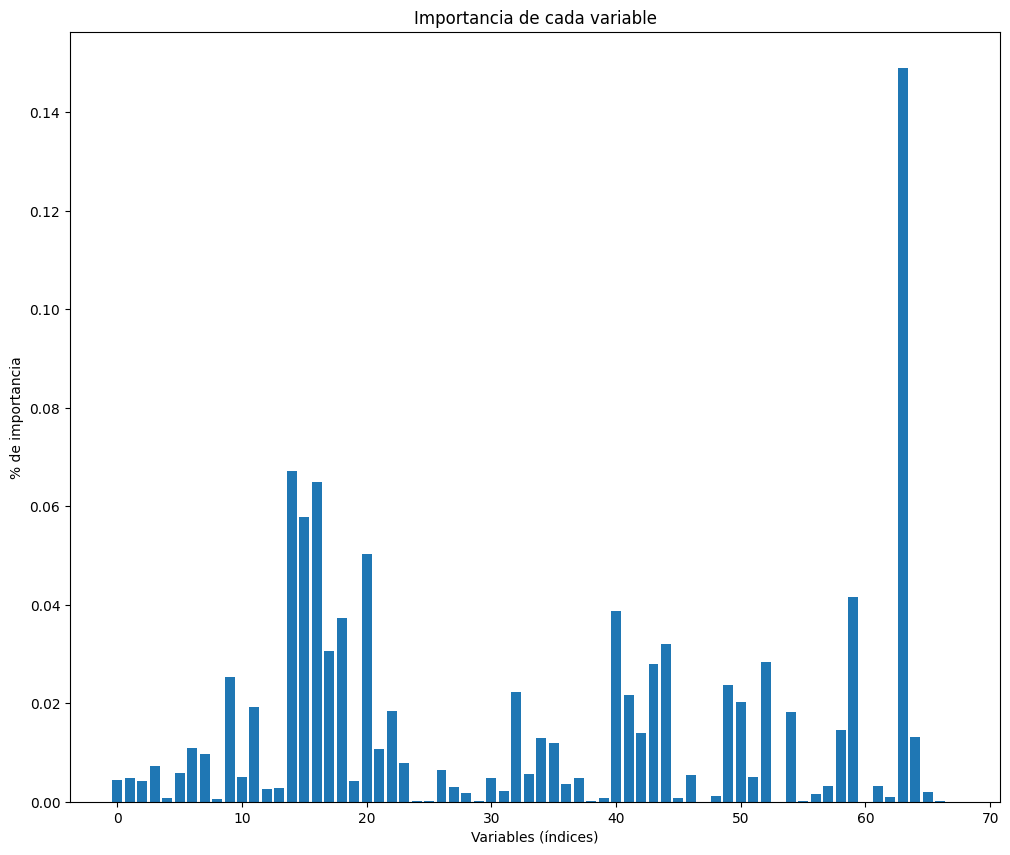

In [905]:
# Let's plot the importances.

fig, ax = plt.subplots(figsize=(12, 10))

ax.set_xlabel("Variables (índices)")
ax.set_ylabel("% de importancia")
ax.set_title("Importancia de cada variable")

plt.bar([x for x in range(len(importance))], importance)
plt.show()

La variable más importante, como era de esperarse, es si el agua tiene contaminantes. De ahí, podemos ver la importancia de cada contaminante en el orden de la lista y su porcentaje. Su ubicación geográfica también juega un papel importante (latitud, longitud y estado), ya que si hay una concentración más fuerte de pozos con semáforo rojo en el centro de la república (como se visualizó en el análisis con KMeans en la primer entrega del reto).

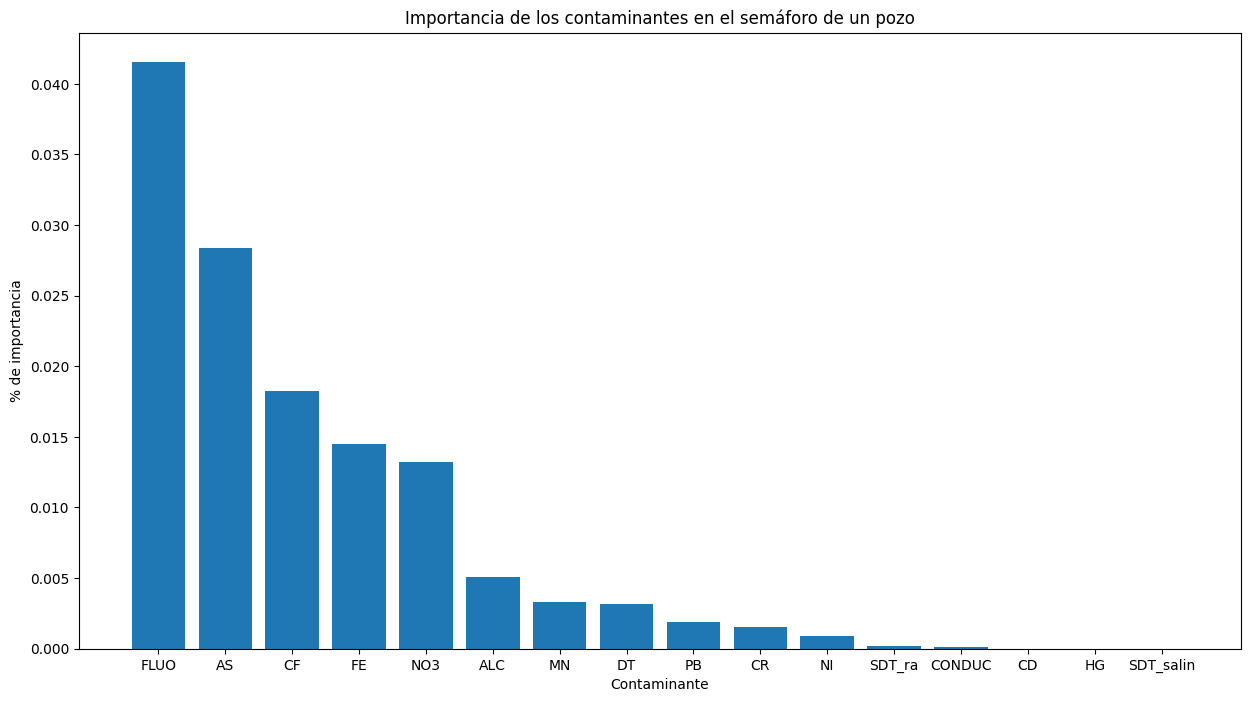

In [906]:
# Let's plot each pollutant.

pollutantDic = dict()
dic = getImportanceDictionary()

for (key, value) in dic.items():
   if "CONTAMINANTES_" in key and key != "CONTAMINANTES_NINGUNO":
       pollutantDic[key] = value


fig, ax = plt.subplots(figsize=(15, 8))

ax.set_xlabel("Contaminante")
ax.set_ylabel("% de importancia")
ax.set_title("Importancia de los contaminantes en el semáforo de un pozo")

plt.bar([pollutant.replace("CONTAMINANTES_", "") for pollutant in pollutantDic.keys()], pollutantDic.values())
plt.show()